# Importing Google Drive

# Importing Libraries

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from scipy.stats import uniform, randint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Importing Datasets

In [2]:
AmesHousing = pd.read_csv('/content/drive/MyDrive/ML Work/Project /AmesHousing.csv')

In [3]:
AmesHousing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
AmesHousing.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [5]:
AmesHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

# Null Value Analysis

In [6]:
AmesHousing.isnull().sum()[AmesHousing.isnull().sum() > 1]

,0
Lot Frontage,490
Alley,2732
Mas Vnr Type,1775
Mas Vnr Area,23
Bsmt Qual,80
Bsmt Cond,80
Bsmt Exposure,83
BsmtFin Type 1,80
BsmtFin Type 2,81
Bsmt Full Bath,2


**Dropping the Columns with more than 40 percent Values**

In [7]:
# Threshold for 40% of the dataset
threshold = 0.4 * len(AmesHousing)

# Drop columns with more than 40% missing values
cols_to_drop = AmesHousing.isnull().sum()[AmesHousing.isnull().sum() > threshold].index

# Drop them from the dataset
AmesHousing_cleaned = AmesHousing.drop(columns=cols_to_drop)

# Imputing the Remaining Columns

In [8]:
AmesHousing_cleaned.isnull().sum()[AmesHousing_cleaned.isnull().sum() > 0]

,0
Lot Frontage,490
Mas Vnr Area,23
Bsmt Qual,80
Bsmt Cond,80
Bsmt Exposure,83
BsmtFin Type 1,80
BsmtFin SF 1,1
BsmtFin Type 2,81
BsmtFin SF 2,1
Bsmt Unf SF,1


In [9]:
# Numeric columns
num_cols = AmesHousing_cleaned.select_dtypes(include=np.number).columns

for col in num_cols:
    if AmesHousing_cleaned[col].isnull().sum() > 0:
        AmesHousing_cleaned[col] = AmesHousing_cleaned[col].fillna(AmesHousing_cleaned[col].median())

# Categorical columns
cat_cols = AmesHousing_cleaned.select_dtypes(exclude=np.number).columns

for col in cat_cols:
    if AmesHousing_cleaned[col].isnull().sum() > 0:
        AmesHousing_cleaned[col] = AmesHousing_cleaned[col].fillna(AmesHousing_cleaned[col].mode()[0])

In [10]:
AmesHousing_cleaned.isnull().sum()[AmesHousing_cleaned.isnull().sum() > 0]

,0


# EDA

In [11]:
AmesHousing_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

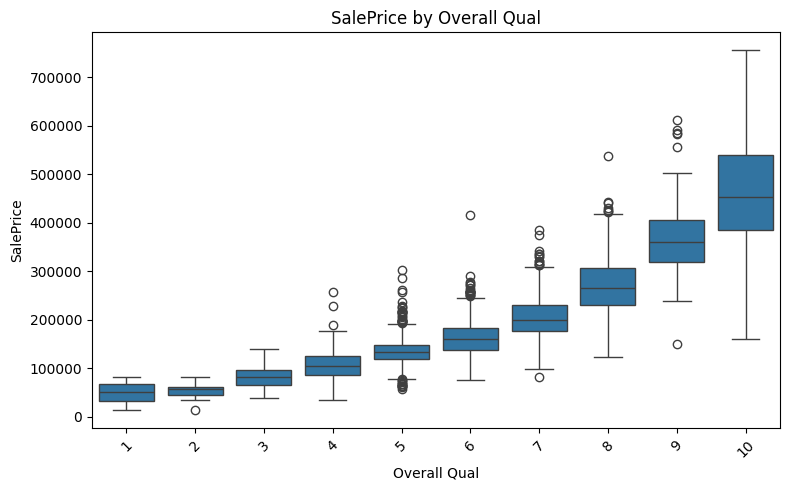

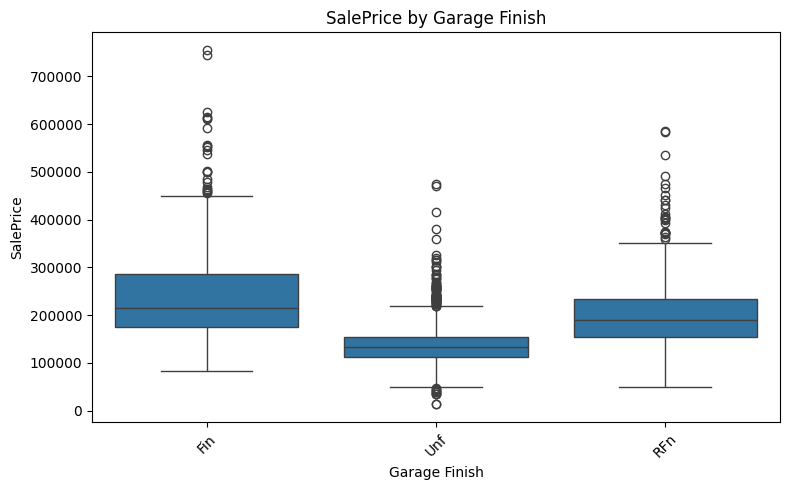

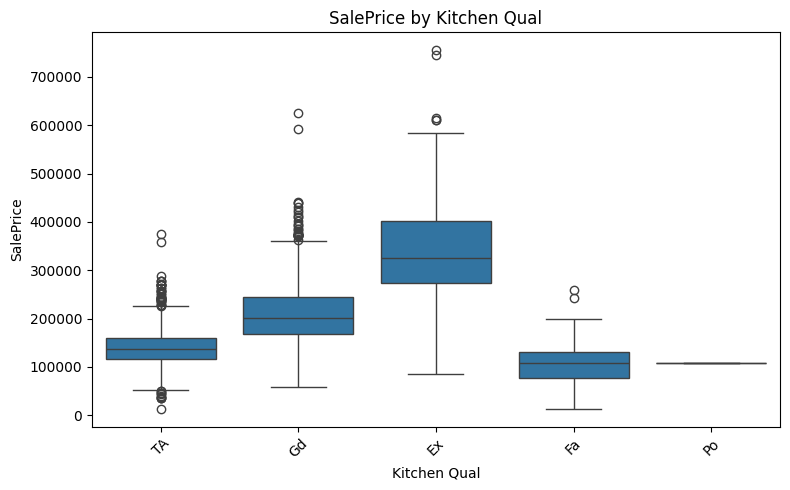

In [12]:
cat_features = ['Overall Qual', 'Garage Finish', 'Kitchen Qual']

for col in cat_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=AmesHousing_cleaned, x=col, y='SalePrice')
    plt.title(f'SalePrice by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

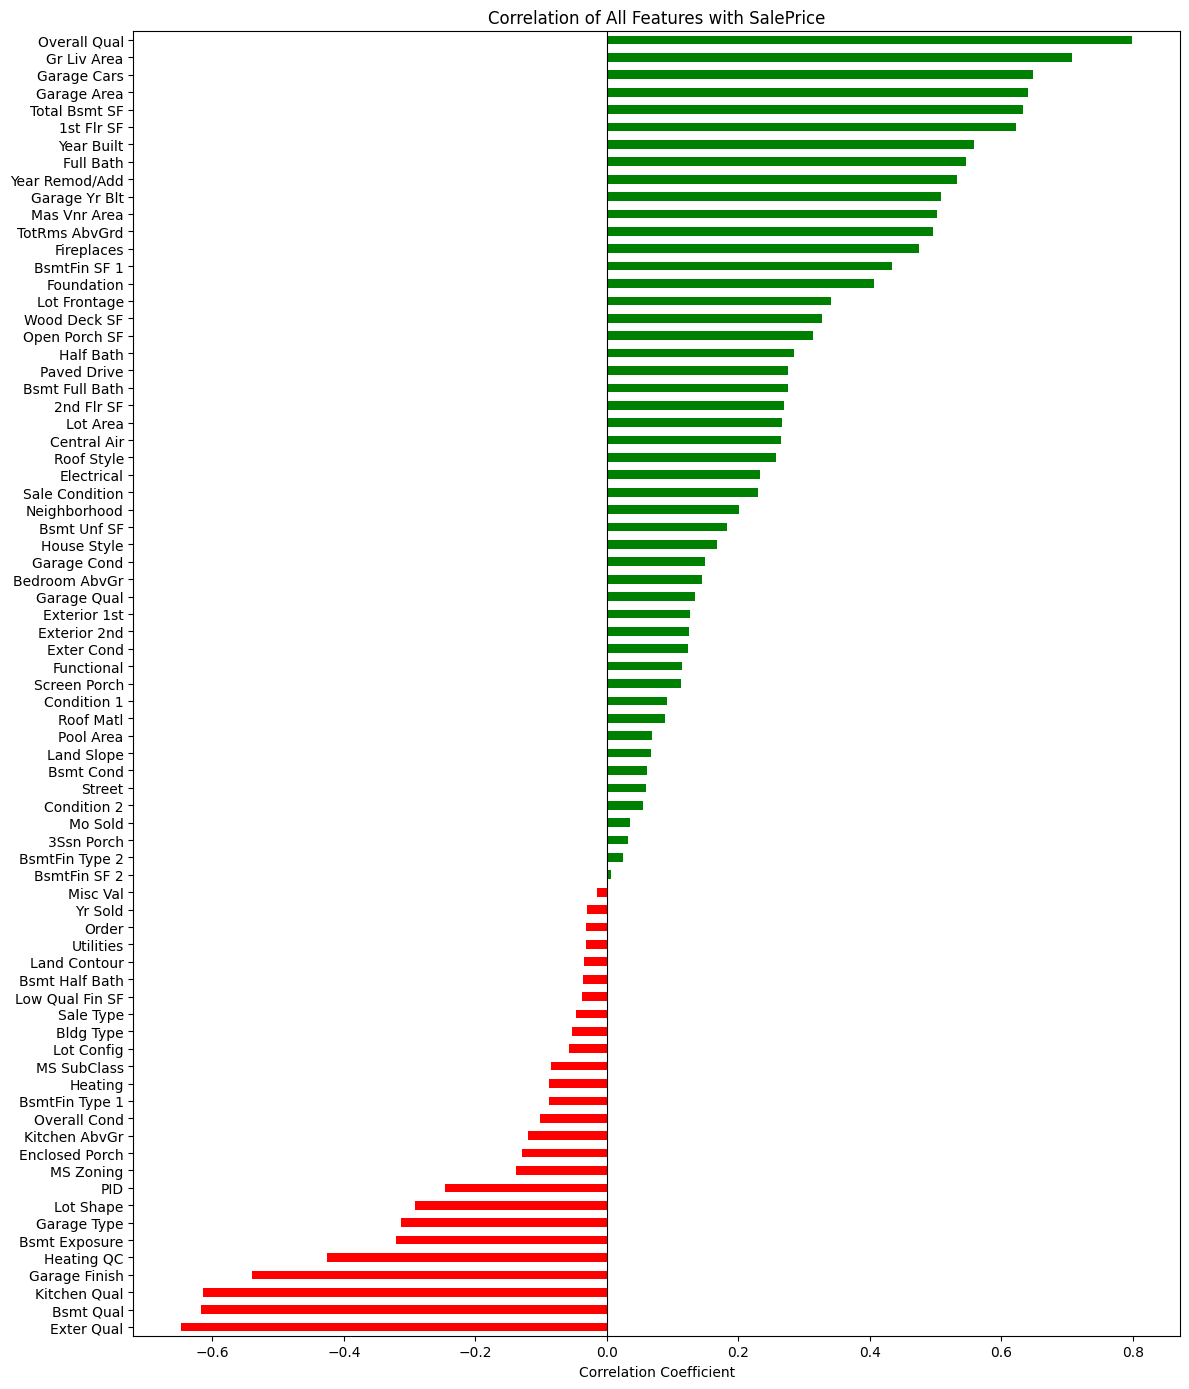

In [13]:
# Copy your cleaned dataset
AmesEncoded = AmesHousing_cleaned.copy()

# Label Encode all categorical columns
label_encoder = LabelEncoder()
for col in AmesEncoded.select_dtypes(include='object').columns:
    AmesEncoded[col] = label_encoder.fit_transform(AmesEncoded[col])

# Calculate correlation with SalePrice
corr_with_price = AmesEncoded.corr()['SalePrice'].drop('SalePrice').sort_values()

# Plot as a horizontal bar chart (colored by sign)
plt.figure(figsize=(12, 14))
corr_with_price.plot(kind='barh', color=corr_with_price.apply(lambda x: 'green' if x > 0 else 'red'))
plt.axvline(0, color='black', linewidth=0.8)
plt.title("Correlation of All Features with SalePrice")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

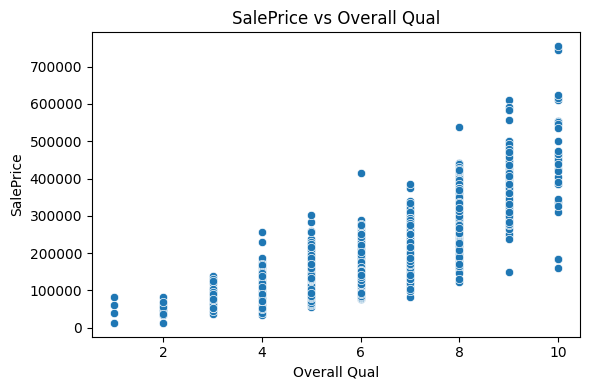

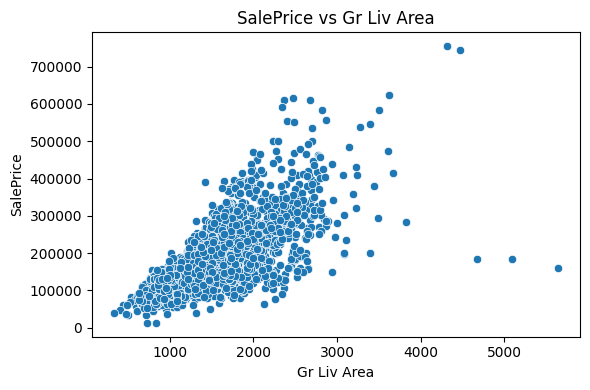

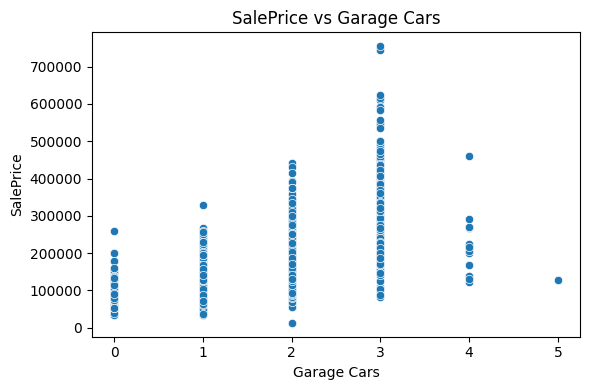

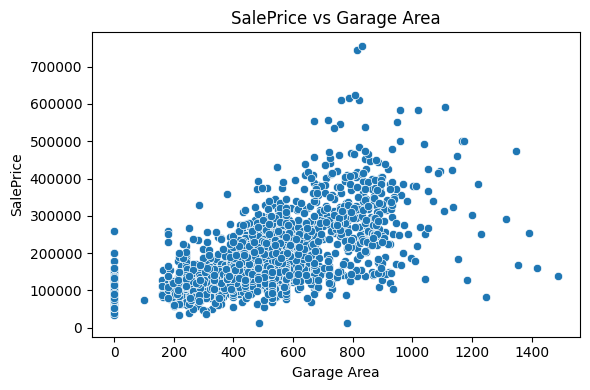

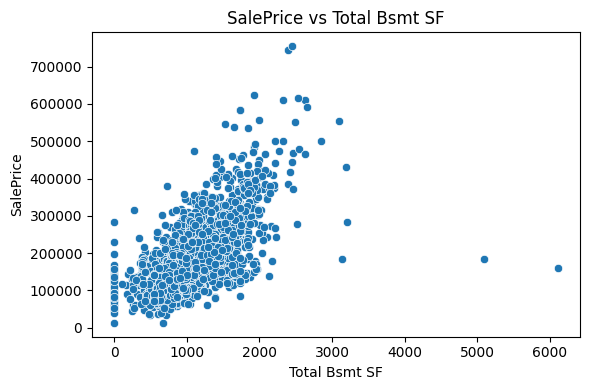

In [14]:
# Correlation matrix (numeric only)
correlation = AmesHousing_cleaned.corr(numeric_only=True)

# Sort correlation with SalePrice
correlation['SalePrice'].sort_values(ascending=False)
top_corr_features = correlation['SalePrice'].sort_values(ascending=False).head(6).index[1:]  # exclude 'SalePrice' itself

# Plot
for feature in top_corr_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=AmesHousing_cleaned, x=feature, y='SalePrice')
    plt.title(f'SalePrice vs {feature}')
    plt.tight_layout()
    plt.show()

# Feature Selection

In [15]:
# Compute correlation matrix
corr_matrix = AmesEncoded.corr()

# Drop 'SalePrice' itself and sort correlations with it
top_corr_features = corr_matrix['SalePrice'].drop('SalePrice').abs().sort_values(ascending=False).head(10)

# Extract feature names
top_10_feature_names = top_corr_features.index.tolist()

# Show them
print("Top 10 features correlated with SalePrice:\n", top_10_feature_names)

Top 10 features correlated with SalePrice:
 ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Exter Qual', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Bsmt Qual', 'Kitchen Qual', 'Year Built']


In [16]:
original_cats = AmesHousing_cleaned.select_dtypes(include='object').columns

# Get top 10 features
top_10 = AmesEncoded.corr()['SalePrice'].drop('SalePrice').abs().sort_values(ascending=False).head(10).index

# Split them
cat_feats = [feat for feat in top_10 if feat in original_cats]
num_feats = [feat for feat in top_10 if feat not in original_cats]

print("Originally Categorical:", cat_feats)
print("Originally Numerical:", num_feats)


Originally Categorical: ['Exter Qual', 'Bsmt Qual', 'Kitchen Qual']
Originally Numerical: ['Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', 'Total Bsmt SF', '1st Flr SF', 'Year Built']


# Train Test Split

In [17]:
# Select top 10 features (already encoded AmesEncoded)
top_features = AmesEncoded.corr()['SalePrice'].drop('SalePrice').abs().sort_values(ascending=False).head(10).index.tolist()

X = AmesEncoded[top_features]
y = AmesEncoded['SalePrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the Data

In [18]:
# Scale features (for Linear Regression and SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining Models Parameter

In [19]:
# SVR parameter distribution
svr_param_grid = {
    'C': uniform(1, 1000),
    'epsilon': uniform(0.01, 1),
    'kernel': ['rbf', 'linear']
}

# Random Forest parameter distribution
rf_param_grid = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5)
}

# Traning the Models

In [20]:
# SVR search
svr_search = RandomizedSearchCV(SVR(), svr_param_grid, n_iter=20, cv=5, scoring='r2', random_state=42, verbose=1)
svr_search.fit(X_train_scaled, y_train)

# RF search
rf_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, n_iter=20, cv=5, scoring='r2', random_state=42, verbose=1)
rf_search.fit(X_train_scaled, y_train)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


LinearRegression()

# Comparing the Performences of Models

In [23]:
models = {
    'Linear Regression': lr,
    'Tuned SVR': svr_search.best_estimator_,
    'Tuned Random Forest': rf_search.best_estimator_
}

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        'R² Score': r2_score(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }

# Convert results dict to DataFrame
results_df = pd.DataFrame(results).T

# Round for readability
results_df = results_df.round(3)

# Display
print("Model Evaluation Metrics on Test Set:\n")
print(results_df)

Model Evaluation Metrics on Test Set:

                     R² Score        MAE           MSE       RMSE
Linear Regression       0.832  23320.681  1.349637e+09  36737.412
Tuned SVR               0.814  22951.915  1.489415e+09  38592.940
Tuned Random Forest     0.875  18467.105  9.984009e+08  31597.482


# Plot Predictions

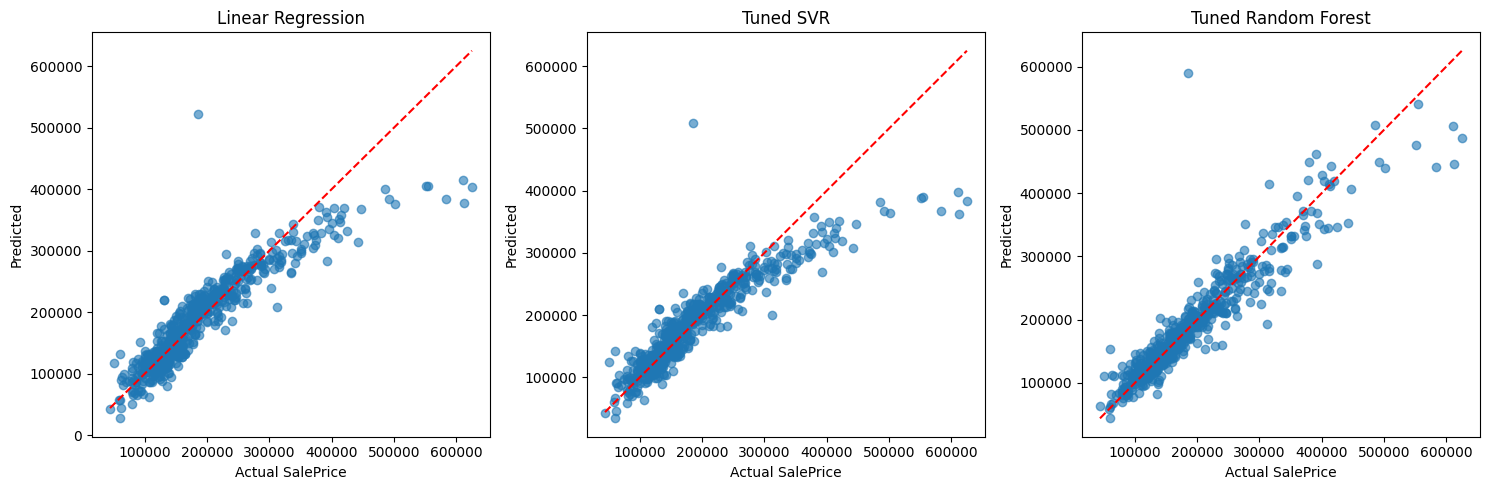

In [22]:
plt.figure(figsize=(15, 5))

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test_scaled)

    plt.subplot(1, 3, i+1)
    plt.scatter(y_test, y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual SalePrice")
    plt.ylabel("Predicted")
    plt.title(name)

plt.tight_layout()
plt.show()

# Building The Neural Network Model

In [36]:
# Build a deeper model
nn_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

nn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 256)                 │           2,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,593 (182.00 KB)

 Trainable params: 46,593 (182.00 KB)

 Non-trainable params: 0 (0.00 B)

# Compiling

In [37]:
# Compile
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


# Training

In [38]:
# Train
history = nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=0
)

In [39]:
# Predict
y_pred_nn = nn_model.predict(X_test_scaled).flatten()

# Add to results
results['Neural Network'] = {
    'R² Score': r2_score(y_test, y_pred_nn),
    'MAE': mean_absolute_error(y_test, y_pred_nn),
    'MSE': mean_squared_error(y_test, y_pred_nn),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_nn))
}

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [40]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).T.round(3)
print("Model Evaluation Metrics:\n")
print(results_df)

Model Evaluation Metrics:

                     R² Score        MAE           MSE       RMSE
Linear Regression       0.832  23320.681  1.349637e+09  36737.412
Tuned SVR               0.814  22951.915  1.489415e+09  38592.940
Tuned Random Forest     0.875  18467.105  9.984009e+08  31597.482
Neural Network          0.853  20648.477  1.174783e+09  34275.113


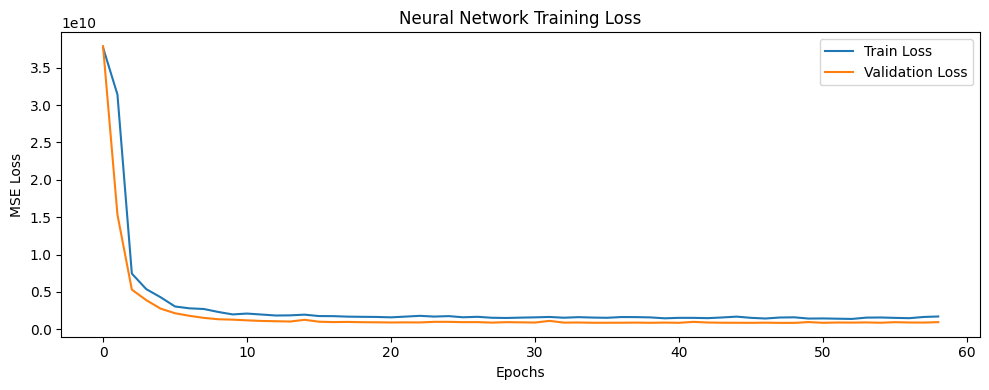

In [41]:
plt.figure(figsize=(10, 4))

# Loss curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Neural Network Training Loss")
plt.legend()
plt.tight_layout()
plt.show()